In [1]:
!pip3 install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=df6e84c5f6139b1ac9f19b24d971602dc3d4765f3e8b9dcb831a20ad0532059c
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [2]:
!pip3 install neupy

     |████████████████████████████████| 226 kB 5.2 MB/s 
     |████████████████████████████████| 92.7 MB 21 kB/s 
     |████████████████████████████████| 3.2 MB 14.0 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 367 kB 39.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progres

In [3]:
!pip3 install neurolab

     |████████████████████████████████| 645 kB 5.1 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22179 sha256=7bf01f174c3ea21fd62de077425a62510b7728d4a151847071225bbf46aab623
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


In [150]:
import random

import numpy as np
from minisom import MiniSom
from neupy.algorithms import SOFM, LVQ
import neurolab as nl
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

In [107]:
def DrawHex(x2, y2, xx, yy, umatrix, weights):    
    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot()

    ax.set_aspect('equal')

    # iteratively add hexagons
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
            hex = RegularPolygon((xx[(i, j)], wy), 
                                 numVertices=6, 
                                 radius=0.95 / np.sqrt(3),
                                 facecolor=cm.Blues(umatrix[i, j]), 
                                 alpha=0.4, 
                                 edgecolor='gray')
            ax.add_patch(hex)

    markers = ['o', 'v', 'x', '*', 'D', 'H', 'P', 's']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']
    for cnt, x in enumerate(x2):
        # getting the winner
        w = som.winner(x)
        # place a marker on the winning position for the sample xx
        wx, wy = som.convert_map_to_euclidean(w) 
        wy = wy * 2 / np.sqrt(3) * 3 / 4
        plt.plot(wx, wy, 
                 markers[y2[cnt]], 
                 markerfacecolor='None',
                 markeredgecolor=colors[y2[cnt]], 
                 markersize=12, 
                 markeredgewidth=2)

    xrange = np.arange(weights.shape[0])
    yrange = np.arange(weights.shape[1])
    plt.xticks(xrange-0.5, xrange)
    plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
    cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                                orientation='vertical', alpha=.4)
    cb1.ax.get_yaxis().labelpad = 16
    cb1.ax.set_ylabel('Distance from neurons in the neighbourhood',
                      rotation=270, fontsize=16)
    plt.gcf().add_axes(ax_cb)

    legend_elements = [Line2D([0], [0], marker='o', color='tab:blue', label='0',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='v', color='tab:orange', label='1',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='x', color='tab:green', label='2',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='*', color='tab:red', label='3',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='D', color='tab:purple', label='4',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='H', color='tab:brown', label='5',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='P', color='tab:pink', label='6',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='s', color='tab:cyan', label='7',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
              borderaxespad=0., ncol=8, fontsize=14)
    plt.show()

In [8]:
#cluster_std=0.1 среднее квадра- тическое отклонение от центра кластера
#centers=8 количество кластеров
x, y, centers = make_blobs(n_samples=80, cluster_std=0.1, n_features=2, centers=8, center_box=(0, 1.5), return_centers=True, random_state=20)

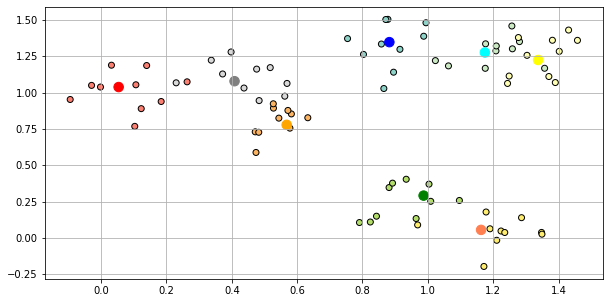

In [123]:
plt.figure(figsize=(10, 5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3', edgecolors = 'black')
cl = ['blue', 'yellow', 'red', 'orange', 'green', 'grey', 'aqua', 'coral']
plt.scatter(centers[:,0], centers[:, 1], s = 90, c = cl)
plt.grid(True)

In [17]:
#Слой Кохонена
layer = nl.net.newc([[0.0, 1.55],[0.0, 1.55]], 8) #передается размер сетки и число кластеров 
error = layer.train(x, epochs=50, show=10)

Epoch: 10; Error: 14.294336103622124;
Epoch: 20; Error: 14.009424032795117;
Epoch: 30; Error: 13.95683029147453;
Epoch: 40; Error: 13.936421663520726;
Epoch: 50; Error: 13.951745622574714;
The maximum number of train epochs is reached


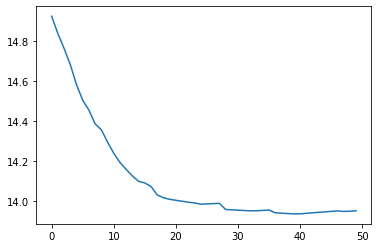

In [18]:
plt.plot(error)

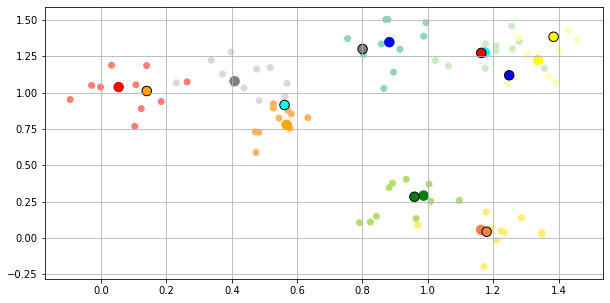

In [122]:
plt.figure(figsize=(10, 5))
wc = layer.layers[0].np['w']
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3')
plt.scatter(centers[:,0], centers[:, 1], s = 90, c = cl)
plt.scatter(wc[:,0], wc[:,1], s = 90, c = cl, edgecolors='black')
plt.grid(True)

In [41]:
print('Центры кластеров\n', wc)

Центры кластеров
 [[1.24897597 1.11855038]
 [1.38469796 1.38344908]
 [1.16338055 1.27250306]
 [0.13979931 1.01042751]
 [0.95898189 0.28280674]
 [0.80022587 1.29935993]
 [0.56138834 0.91431674]
 [1.17974788 0.04201996]]


In [117]:
randPoints = []
for _ in range(5): 
  randPoints.append([np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)])
randPoints = np.array(randPoints)

Классы: [7 3 4 5 4]


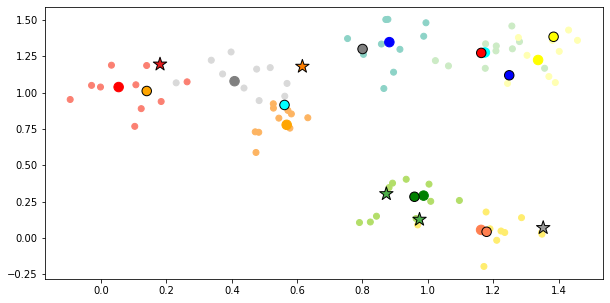

In [118]:
pred = layer.sim(randPoints)
pred = np.argmax(pred, axis=1)
print("Классы:", pred)

plt.figure(figsize=(10, 5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3')
plt.scatter(centers[:,0], centers[:, 1], s = 90, c = cl)
plt.scatter(wc[:,0], wc[:,1], s = 90, c = cl, edgecolors='black')
plt.scatter(randPoints[:, 0], randPoints[:, 1], c=pred, cmap='Set1', marker='*', s=200, edgecolors='black')

In [80]:
#Карта Кохонена размера 2x4 с гексагональной сеткой
som = MiniSom(2, 4, x.shape[1], sigma=0.66, learning_rate=0.6, activation_distance='euclidean', topology='hexagonal', neighborhood_function='gaussian', random_seed=42)
som.train(x, 150, verbose=True) #150 эпох

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.14709885036341713


In [81]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

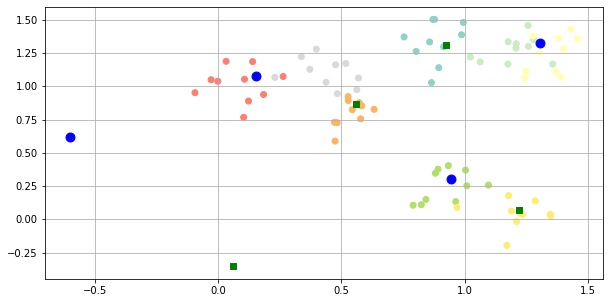

In [119]:
plt.figure(figsize=(10, 5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3')
plt.scatter(weights[0][:,0], weights[0][:,1], s=80, c = 'blue')
plt.plot(weights[1][:,0], weights[1][:,1], 'gs')
plt.grid(True)

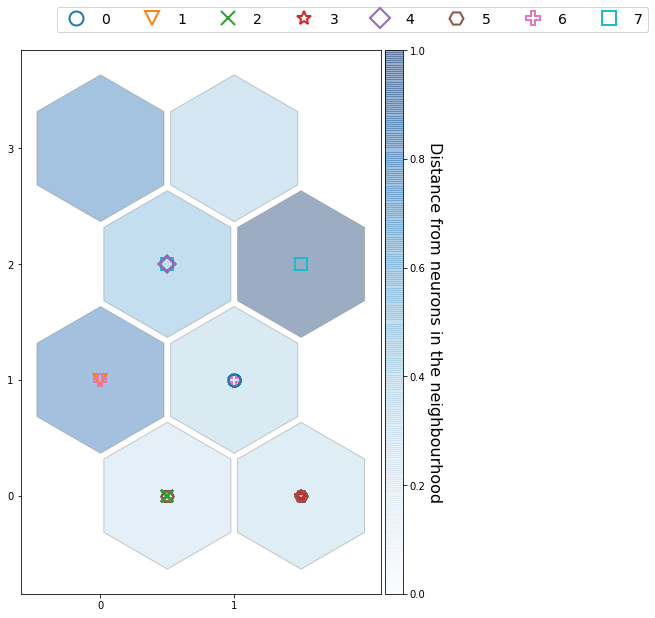

In [108]:
DrawHex(x, y, xx, yy, umatrix, weights)

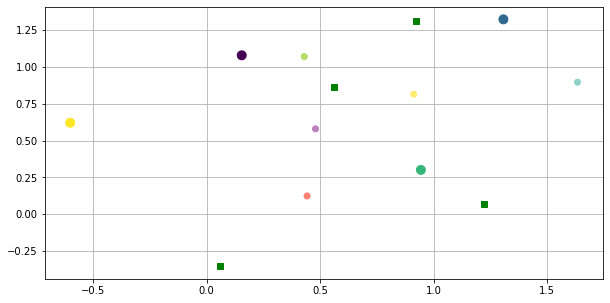

In [121]:
randx, randy = make_blobs(n_samples=5, cluster_std=0.1, n_features=2, centers=8, center_box=(0, 1.5), random_state=91)
plt.figure(figsize=(10, 5))
plt.scatter(randx[:, 0], randx[:, 1], c=[0,1,2,3,4], cmap='Set3')
plt.scatter(weights[0][:,0], weights[0][:,1], s=80, c = [0,1,2,3])
plt.plot(weights[1][:,0], weights[1][:,1], 'gs')
plt.grid(True)

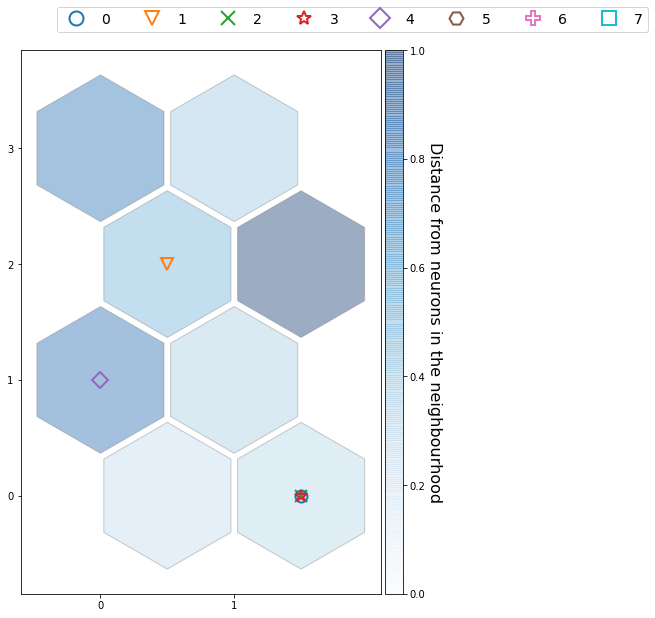

In [109]:
DrawHex(randx, randy, xx, yy, umatrix, weights)

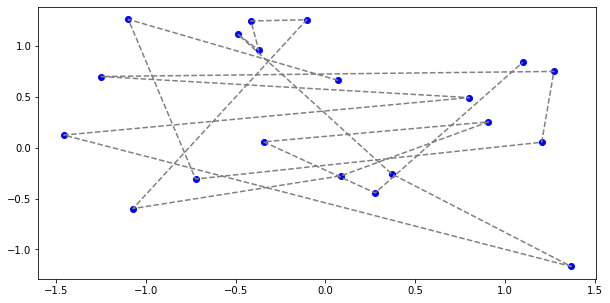

In [128]:
#Карта Кохонена для нахождения одного из решений задачи коммивояжера
z = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for _ in range(20)])

plt.figure(figsize=(10, 5))
plt.plot(z[:, 0], z[:, 1], '--', c='grey')
plt.scatter(z[:, 0], z[:, 1], c='blue');

/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


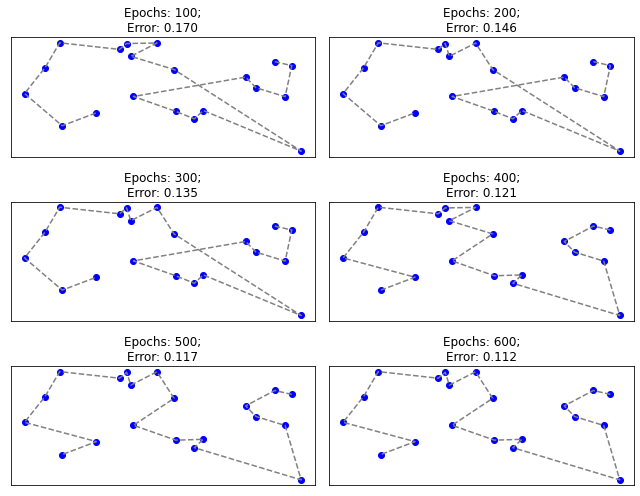

In [142]:
som = MiniSom(1, 80, z.shape[1], sigma=8, learning_rate=0.4, neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(z)

plt.figure(figsize=(9, 7))
for i, iterations in enumerate(range(100, 601, 100)):
    som.train(z, iterations, verbose=False, random_order=False)
    plt.subplot(3, 2, i+1)
    plt.scatter(z[:, 0], z[:, 1], c='blue')
    visit_order = np.argsort([som.winner(p)[1] for p in z])
    plt.plot(z[visit_order][:,0], z[visit_order][:,1], '--', c='grey')
    plt.title("Epochs: {i};\nError: {e:.3f}".format(i=iterations, e=som.quantization_error(z)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

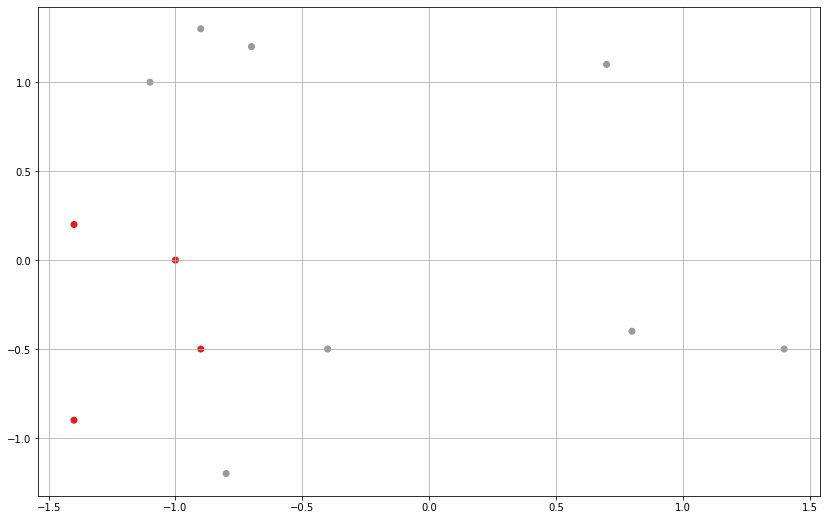

In [146]:
#LVQ-сеть для классификации точек, когда классы линейно неразделимыми
points = np.array([[0.8, 0.7, -0.8, -0.9, -0.7, -1.4, -1.1, -1, 1.4, -1.4, -0.4, -0.9],
                   [-0.4, 1.1, -1.2, -0.5, 1.2, 0.2, 1, 0, -0.5, -0.9, -0.5, 1.3]]).T

target = np.array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

plt.figure(figsize=(14, 9))
plt.scatter(points[:, 0], points[:, 1], c=target, cmap='Set1')
plt.grid(True)

In [162]:
lvqnet = LVQ(n_inputs=2, n_classes=2, step=0.1)
lvqnet.train(points, target, epochs=600)

In [159]:
from matplotlib.colors import ListedColormap

def draw(model):
  plt.figure(figsize=(15,8))
  eps = 0.1
  xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
                      np.linspace(-1.5, 1.5, 200))
  F = np.c_[xx.ravel(), yy.ravel()]
  Z = np.array([])
  s = model.predict(F)
  Z = np.append(Z, s)
  Z = Z.reshape(xx.shape)
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(points[:, 0], points[:, 1], c=target, cmap='Set1')
  plt.show()

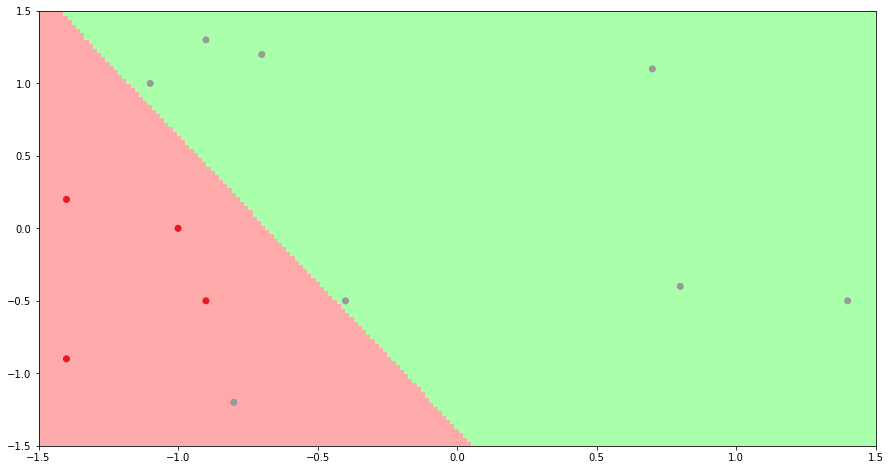

In [160]:
draw(lvqnet)